In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from census import Census
from census.core import CensusException
from us import states

logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

with open('census_key.txt') as key:
    api_key = key.read().strip()

c = Census(api_key)

#######################
# Customizable Values #
#######################
YEARS = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
STATE = states.MD.fips
COUNTY = 510
TRACTS = ['020100', '020200']


def get_value(names):
    #logging.info(names)
    ret = {x: 0 for x in YEARS}
    if not isinstance(names, list):
        names = [names]

    for year in YEARS:
        #logging.info(year)
        ret[year] = 0
        for tract in TRACTS:
            #logging.info(tract)
            for name in names:
                #logging.info(name)
                try:
                    ret[year] += int(c.acs5.get(('NAME', name), {'for': 'tract:{}'.format(tract),
                                                             'in': 'county:{} state:{}'.format(COUNTY, STATE)},
                                            year=year)[0][name])
                except CensusException:
                    pass
    #logging.info(ret)
    return ret
    
    
def draw_line_graph(census_pairs, title=None, xlabel='Year', ylabel=None):
    """
    Draws a line graph
    :param census_pairs: Tuple of tuples with the (census id, label)
    :param title: Graph title
    :param ylabel: Label for the y axis
    :param xlabel: Label for the x axis
    :return: 
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for _, i in enumerate(census_pairs):
        census_id = i[0]
        label = i[1]
        val = get_value(census_id)
        plt.plot(val.keys(), val.values(), label=label)
        
        for xy in val.items(): 
            ax.annotate('%s' % xy[1], xy=xy, textcoords='data') 

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    

def draw_100p_area_graph(census_pairs, title=None, xlabel='Year', ylabel=None):
    """
    Draws a line graph
    :param census_pairs: Tuple of tuples with the (census id, label). census id can be a list, where the results of each
    census id's value will be summed
    :param title: Graph title
    :param ylabel: Label for the y axis
    :param xlabel: Label for the x axis
    :return: None
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    vals = []
    labels = []
    for _, i in enumerate(census_pairs):
        census_id = i[0]
        label = i[1]
        val = get_value(census_id)
        
        vals.append(list(val.values()))
        labels.append(label)
        
    y = np.row_stack(vals)
    x = YEARS

    # Make new array consisting of fractions of column-totals,
    # using .astype(float) to avoid integer division
    percent = y / y.sum(axis=0).astype(float) * 100

    ax.stackplot(x, percent, labels=labels)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.margins(0, 0)  # Set margins to avoid "whitespace"
    ax.legend(loc='lower left')

    plt.show()

This notebook uses census data to look at the population values for different traits of neighborhoods

# Population values
This graph looks at the aggregate popuation of the census tracts we are looking at.

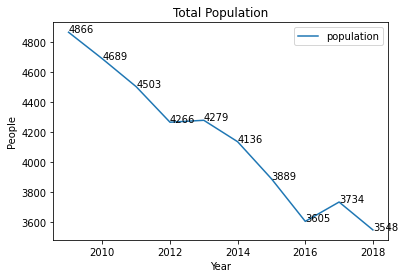

In [2]:
draw_line_graph((('B01003_001E', 'population'),), title='Total Population', ylabel='People')

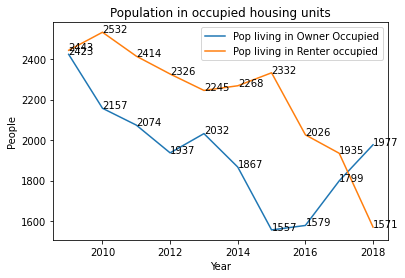

In [3]:
draw_line_graph((('B25008_002E', 'Pop living in Owner Occupied'),
                ('B25008_003E', 'Pop living in Renter occupied')), 
                title='Population in occupied housing units', ylabel='People')

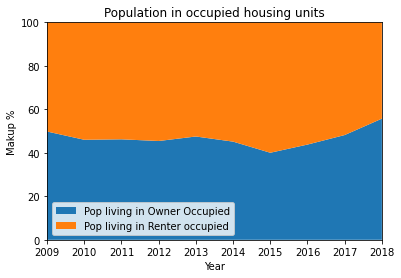

In [4]:
draw_100p_area_graph((('B25008_002E', 'Pop living in Owner Occupied'),
                      ('B25008_003E', 'Pop living in Renter occupied')), 
                     title='Population in occupied housing units', ylabel='Makup %')

# Racial Makeup
The Census collects data about the self reported race of each respondent. This graph shows that breakdown by population. The following graph shows the racial makeup as a percentage of the total

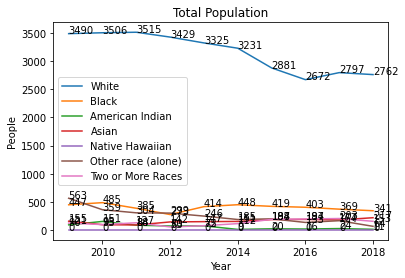

In [5]:
draw_line_graph((('B01001A_001E', 'White'),  # WHITE ALONE
                 ('B01001B_001E', 'Black'),  # BLACK OR AFRICAN AMERICAN ALONE
                 ('B01001C_001E', 'American Indian'),  # AMERICAN INDIAN AND ALASKA NATIVE ALONE
                 ('B01001D_001E', 'Asian'),  # ASIAN ALONE
                 ('B01001E_001E', 'Native Hawaiian'),  # Native Hawaiian
                 ('B01001F_001E', 'Other race (alone)'),  # SOME OTHER RACE ALONE
                 ('B01001G_001E', 'Two or More Races'),  # TWO OR MORE RACES
                ), title='Total Population', ylabel='People')

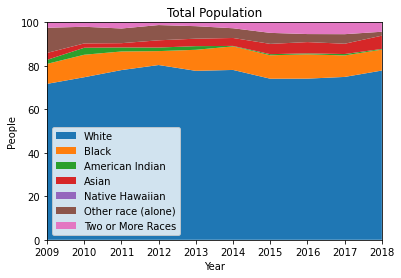

In [6]:
draw_100p_area_graph((('B01001A_001E', 'White'),  # WHITE ALONE
                 ('B01001B_001E', 'Black'),  # BLACK OR AFRICAN AMERICAN ALONE
                 ('B01001C_001E', 'American Indian'),  # AMERICAN INDIAN AND ALASKA NATIVE ALONE
                 ('B01001D_001E', 'Asian'),  # ASIAN ALONE
                 ('B01001E_001E', 'Native Hawaiian'),  # Native Hawaiian
                 ('B01001F_001E', 'Other race (alone)'),  # SOME OTHER RACE ALONE
                 ('B01001G_001E', 'Two or More Races'),  # TWO OR MORE RACES
                ), title='Total Population', ylabel='People')

# Ethnicity
This is the ethnicity of the neighborhood. 

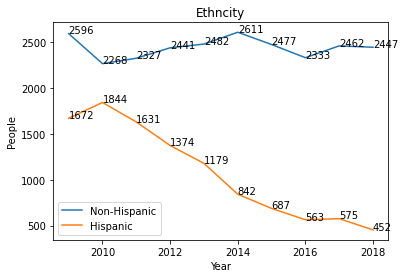

In [7]:
draw_line_graph((('B01001H_001E', 'Non-Hispanic'),
                 ('B01001I_001E', 'Hispanic')), title='Ethncity', ylabel='People')

# Housing costs

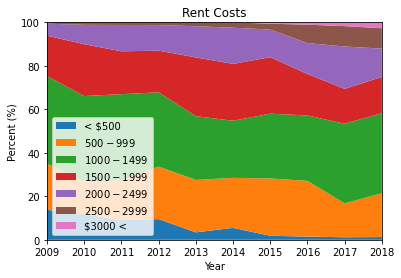

In [8]:
draw_100p_area_graph(((['B25063_0{:0>2}E'.format(i) for i in range(3, 12)], '< $500'),  # < $500
                     (['B25063_0{:0>2}E'.format(i) for i in range(12, 19)], '$500-$999'),  # $500-$999
                     (['B25063_0{:0>2}E'.format(i) for i in range(20, 22)], '$1000-$1499'),  # $1000-$1499
                     ('B25063_022E', '$1500-$1999'),  # $1500-$1999
                     ('B25063_023E', '$2000-$2499'),  # $2000-$2499
                     ('B25063_024E', '$2500-$2999'),  # $2500-$2999
                     (['B25063_0{:0>2}E'.format(i) for i in range(25, 27)], '$3000 <')),  # $3000 <
                     title='GROSS RENT', ylabel='Percent (%)')

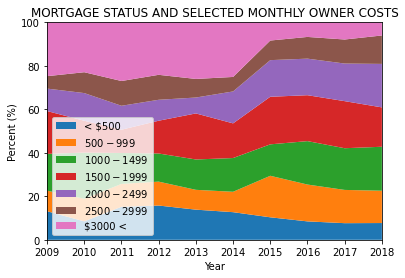

In [18]:
draw_100p_area_graph(((['B25087_0{:0>2}E'.format(i) for i in list(range( 3,  7)) + list(range(21,29))], '< $500'),  # < $500
                     (['B25087_0{:0>2}E'.format(i) for i in list(range( 7, 12)) + list(range(29,34))], '$500-$999'),  # $500-$999
                     (['B25087_0{:0>2}E'.format(i) for i in list(range(12, 14)) + list(range(34,38))], '$1000-$1499'),  # $1000-$1499
                     (['B25087_014E', 'B25087_039E'], '$1500-$1999'),  # $1500-$1999
                     (['B25087_015E'], '$2000-$2499'),  # $2000-$2499
                     (['B25087_016E'], '$2500-$2999'),  # $2500-$2999
                     (['B25087_0{:0>2}E'.format(i) for i in range(17, 20)], '$3000 <')),  # $3000 <
                     title='MORTGAGE STATUS AND SELECTED MONTHLY OWNER COSTS', ylabel='Percent (%)')


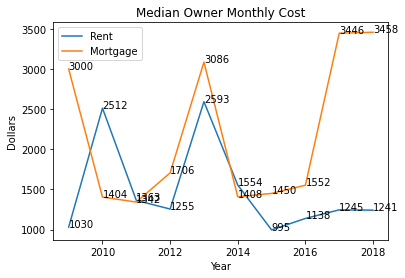

In [10]:
draw_line_graph((('B25064_001E', 'Rent'),  # median rental cost
                 ('B25088_001E', 'Mortgage')), title='Median Owner Monthly Cost', ylabel='Dollars')

# Housing usage

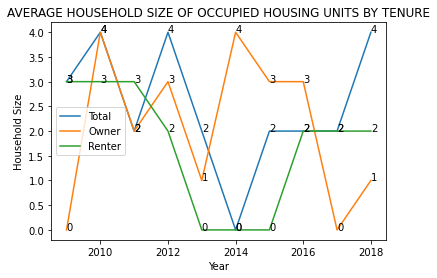

In [11]:
draw_line_graph((('B25010_001E', 'Total'),
                 ('B25010_002E', 'Owner'),
                 ('B25010_003E', 'Renter')), 
                title='AVERAGE HOUSEHOLD SIZE OF OCCUPIED HOUSING UNITS BY TENURE', ylabel='Household Size')

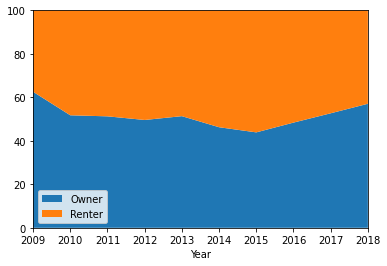

In [19]:
draw_100p_area_graph((('B25032_002E', 'Owner'),
                      ('B25032_013E', 'Renter')), title=None, xlabel='Year', ylabel=None)

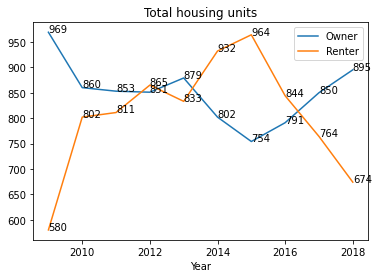

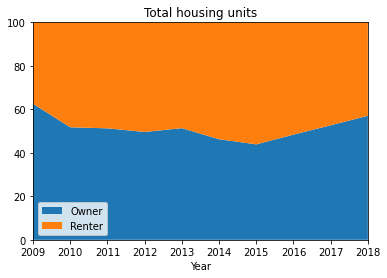

In [20]:
draw_line_graph((('B25012_002E', 'Owner'),
                      ('B25012_010E', 'Renter')), title='Total housing units', xlabel='Year', ylabel=None)
draw_100p_area_graph((('B25012_002E', 'Owner'),
                      ('B25012_010E', 'Renter')), title='Total housing units', xlabel='Year', ylabel=None)

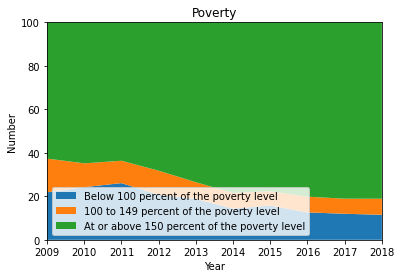

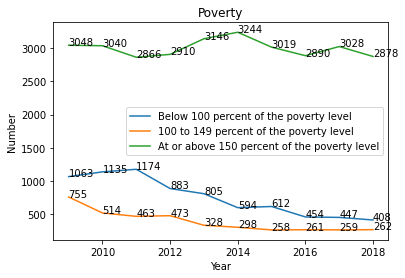

In [21]:
draw_100p_area_graph((('B06012_002E', 'Below 100 percent of the poverty level'),
                      ('B06012_003E', '100 to 149 percent of the poverty level'),
                      ('B06012_004E', 'At or above 150 percent of the poverty level')), 
                      title="Poverty", ylabel='Number')
                     
draw_line_graph((('B06012_002E', 'Below 100 percent of the poverty level'),
                      ('B06012_003E', '100 to 149 percent of the poverty level'),
                      ('B06012_004E', 'At or above 150 percent of the poverty level')), 
                      title="Poverty", ylabel='Number')

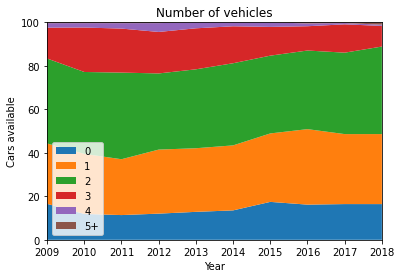

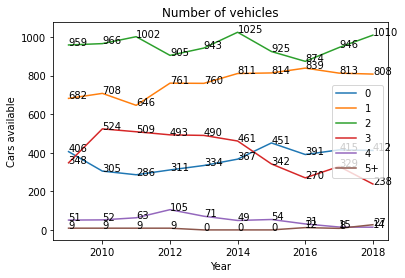

In [22]:
draw_100p_area_graph((('B08014_002E', '0'),
                      ('B08014_003E', '1'),
                      ('B08014_004E', '2'),
                      ('B08014_005E', '3'),
                      ('B08014_006E', '4'),
                      ('B08014_007E', '5+')), title='Number of vehicles', ylabel='Cars available')
draw_line_graph((('B08014_002E', '0'),
                      ('B08014_003E', '1'),
                      ('B08014_004E', '2'),
                      ('B08014_005E', '3'),
                      ('B08014_006E', '4'),
                      ('B08014_007E', '5+')), title='Number of vehicles', ylabel='Cars available')

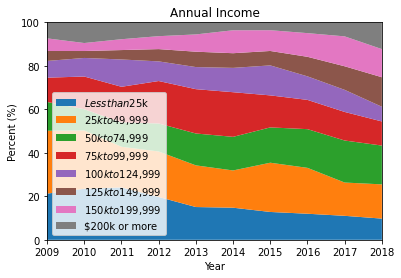

In [23]:
draw_100p_area_graph(((['B19001_0{:0>2}E'.format(i) for i in range(2, 6)], '$Less than $25k'), 
                     (['B19001_0{:0>2}E'.format(i) for i in range(6, 11)], '$25k to $49,999'),
                     (['B19001_0{:0>2}E'.format(i) for i in range(11, 13)], '$50k to $74,999'),
                     ('B19001_013E', '$75k to $99,999'),
                     ('B19001_014E', '$100k to $124,999'),
                     ('B19001_015E', '$125k to $149,999'),
                     ('B19001_016E', '$150k to $199,999'),
                     ('B19001_017E', '$200k or more')),
                     title='Annual Income', ylabel='Percent (%)')